# Feature Selection for Regression Data

Source: https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

# Step0: Define Input Output

In [1]:
##Define parameters
dataType = "normReadCount"
enzyme = "Act_BetaGlucosidase"
medium = "GlucoseWS"
method = "LinearRegression"

numPreSelectGene = 50

##Define output
pathOut = "C:\\Users\\wutto\\Desktop\\ML_aspergillus_aculeatus\\2_experiment_feature_important\\2_pythonNoteBook_normReadCount\\"
outFileListGene50 = pathOut+"50_"+dataType+"_"+enzyme.replace("Act_","")+"_"+medium+"_"+method+".txt"
outFileTopGene = pathOut+"top_"+dataType+"_"+enzyme.replace("Act_","")+"_"+medium+"_"+method+".txt"

# Step1: Data Loading and preparing

In [2]:
##Import Required Modules
import plotly.express as px
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
##Loading Data (CSV format)
#url='https://raw.githubusercontent.com/wutto/aspergillusAculeatus/main/1_input_normReadCount_profile.csv'
url = "C:\\Users\\wutto\\Desktop\\ML_aspergillus_aculeatus\\2_experiment_feature_important\\1_input_expression\\1_input_normReadCount_lot2_cutGene.csv"
dataLot2=pd.read_csv(url)
dataLot2.head()
#dataLot2 =  dataLot2[dataLot2['medium']==medium]

,strain,Lot,medium,sampleName,time,strain_medium,strain_time,strain_lot,medium_time,Act_CMCase,...,acu08286_1,acu08287_1,acu08288_1,acu08289_1,acu08290_1,acu08291_1,acu08292_1,acu08293_1,acu08294_1,acu08295_1
0,BCC199,Lot2,Glucose,BCC199_G3F,Day3,BCC199_G,BCC199_H3,BCC199_Lot2,Glucose_Day3,0.437,...,13.734621,340.855199,2543.944640,1802.948878,5382.173306,1292.768122,359.161217,8595.277379,161.774591,103.672882
1,BCC199,Lot2,Glucose,BCC199_G3H,Day3,BCC199_G,BCC199_H3,BCC199_Lot2,Glucose_Day3,0.353,...,16.417992,199.378158,306.276233,172.653639,507.737989,199.378158,119.204602,7291.654272,57.532636,13.334393
2,BCC199,Lot2,Glucose,BCC199_G6M,Day6,BCC199_G,BCC199_H6,BCC199_Lot2,Glucose_Day6,0.364,...,8.365875,198.957898,238.549477,130.823552,460.446470,103.201519,78.341690,6635.812150,160.287053,149.238240
3,BCC199,Lot2,Glucose,BCC199_G6N,Day6,BCC199_G,BCC199_H6,BCC199_Lot2,Glucose_Day6,0.299,...,16.510022,227.446326,431.144619,331.880476,950.213366,265.704381,113.706162,6684.785616,250.194358,173.678248
4,BCC199,Lot2,WS,BCC199_S3K,Day3,BCC199_S,BCC199_H3,BCC199_Lot2,WS_Day3,8.229,...,12.350391,238.326348,37.114879,3.063707,2.031854,1.000000,116.567613,3087.274383,59.815660,55.688246


In [4]:
##Loading functional mapping file
url='https://raw.githubusercontent.com/wutto/aspergillusAculeatus/main/function.xlsx'
function=pd.read_excel(url)
#function.head()

In [5]:
##Loading functional mapping file
b = open("C:\\Users\\wutto\\Desktop\\ML_aspergillus_aculeatus\\1_data_exploration\\function.txt",'r').readlines()
del b[0]##delete header

funMap = {}
for i in b:
    iList = i.replace("\n","").split("\t")
    key = iList[1]
    value = iList[11]+"|"+iList[18]
    funMap[key] = value

In [6]:
dataLot2

,strain,Lot,medium,sampleName,time,strain_medium,strain_time,strain_lot,medium_time,Act_CMCase,...,acu08286_1,acu08287_1,acu08288_1,acu08289_1,acu08290_1,acu08291_1,acu08292_1,acu08293_1,acu08294_1,acu08295_1
0,BCC199,Lot2,Glucose,BCC199_G3F,Day3,BCC199_G,BCC199_H3,BCC199_Lot2,Glucose_Day3,0.437,...,13.734621,340.855199,2543.944640,1802.948878,5382.173306,1292.768122,359.161217,8595.277379,161.774591,103.672882
1,BCC199,Lot2,Glucose,BCC199_G3H,Day3,BCC199_G,BCC199_H3,BCC199_Lot2,Glucose_Day3,0.353,...,16.417992,199.378158,306.276233,172.653639,507.737989,199.378158,119.204602,7291.654272,57.532636,13.334393
2,BCC199,Lot2,Glucose,BCC199_G6M,Day6,BCC199_G,BCC199_H6,BCC199_Lot2,Glucose_Day6,0.364,...,8.365875,198.957898,238.549477,130.823552,460.446470,103.201519,78.341690,6635.812150,160.287053,149.238240
3,BCC199,Lot2,Glucose,BCC199_G6N,Day6,BCC199_G,BCC199_H6,BCC199_Lot2,Glucose_Day6,0.299,...,16.510022,227.446326,431.144619,331.880476,950.213366,265.704381,113.706162,6684.785616,250.194358,173.678248
4,BCC199,Lot2,WS,BCC199_S3K,Day3,BCC199_S,BCC199_H3,BCC199_Lot2,WS_Day3,8.229,...,12.350391,238.326348,37.114879,3.063707,2.031854,1.000000,116.567613,3087.274383,59.815660,55.688246
5,BCC199,Lot2,WS,BCC199_S3L,Day3,BCC199_S,BCC199_H3,BCC199_Lot2,WS_Day3,7.114,...,57.097389,209.495298,55.227476,11.284521,4.739826,1.934956,109.454953,3144.323724,63.642085,110.389910
6,BCC199,Lot2,WS,BCC199_S6T,Day6,BCC199_S,BCC199_H6,BCC199_Lot2,WS_Day6,14.978,...,50.341839,132.578236,72.271545,25.122677,120.516898,13.061338,13.061338,3037.167796,64.596147,20.736735
7,BCC199,Lot2,WS,BCC199_S6U,Day6,BCC199_S,BCC199_H6,BCC199_Lot2,WS_Day6,12.771,...,32.591339,141.405950,96.944066,9.190347,79.393322,16.210645,3.340099,3143.753178,43.121785,6.850248
8,BCC56535,Lot2,Glucose,BCC56535_G3F,Day3,BCC56535_G,BCC56535_H3,BCC56535_Lot2,Glucose_Day3,0.472,...,11.982598,406.257869,1384.807358,273.368432,1646.193192,248.108457,104.236422,2263.415204,40.537353,1.000000
9,BCC56535,Lot2,Glucose,BCC56535_G3H,Day3,BCC56535_G,BCC56535_H3,BCC56535_Lot2,Glucose_Day3,0.535,...,25.662922,574.887221,2674.081306,904.990945,2343.977582,489.515569,165.103288,2486.263670,71.194470,2.897148


In [7]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [8]:
featureData = dataLot2.iloc[0:24,17:8632]##split feature value
featureList = list(featureData.columns)
X=dataLot2.iloc[0:24,17:8632].to_numpy()
Y=dataLot2[enzyme].to_numpy()

# Step2: Feature Selection

In [9]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [29]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

##Source: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

C:\Users\wutto\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\wutto\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


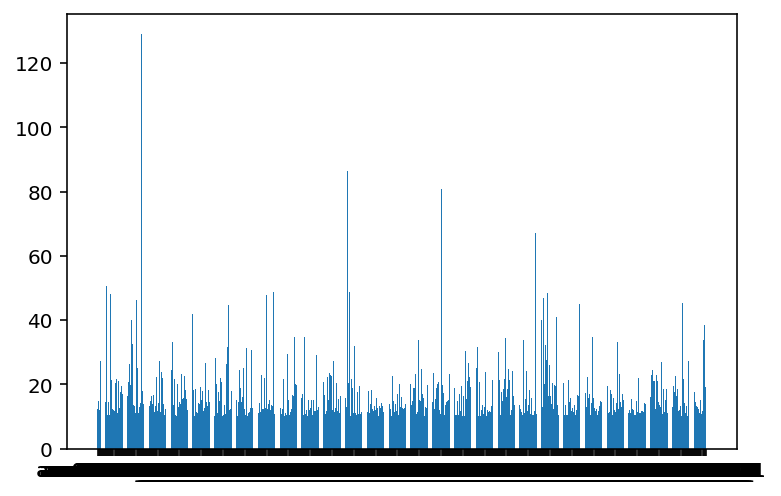

In [30]:
import matplotlib.pyplot as plt
# what are scores for the features
importantFeature = {}
dataPlotFeature = []
dataPlotScore = []
score = {}

for i in range(len(fs.scores_)):
    if fs.scores_[i] > 10:
        key = featureList[i]
        value = []
        value.append(fs.scores_[i])##Score
        value.append(funMap[featureList[i]])##Function
        importantFeature[key] = value
        dataPlotFeature.append(featureList[i])
        dataPlotScore.append(fs.scores_[i])
        
        ##Adding data into score variable
        score[fs.scores_[i]] = [featureList[i],funMap[featureList[i]]]
# plot the scores
#plt.bar([i for i in range(len(fs.scores_))], fs.scores_)

plt.bar(dataPlotFeature,dataPlotScore)

plt.show()

In [31]:
##ดึงค่าและเรียงลำดับ feature ที่สำคัญจากน้อยไปมาก
scoreSort = list(score.keys())
scoreSort.sort()
scoreSort.reverse()

##Save selected feature
saveFile = open(outFileListGene50,"w")
header = ["InputType","Enzyme","Medium","Method","GeneId","Score","Function"]
saveFile.write("\t".join(header))
saveFile.write("\n")

for i in scoreSort[0:numPreSelectGene]:
    dataRecord = dataType+"\t"+enzyme.replace("Act_","")+"\t"+medium+"\t"+method+"\t"+score[i][0]+"\t"+str(i)+"\t"+score[i][1]+"\n"
    saveFile.write(dataRecord)
    print (dataRecord)
saveFile.close()



normReadCount	BetaGlucosidase	GlucoseWS	LinearRegression	acu00356_2	128.9287072861992	Alpha-galactosidase (EC 3.2.1.22) (Fragment)|IPR013785;IPR004352;IPR017853;

normReadCount	BetaGlucosidase	GlucoseWS	LinearRegression	acu03030_1	86.30150729648611	Uncharacterized protein|noData

normReadCount	BetaGlucosidase	GlucoseWS	LinearRegression	acu00387_1	84.77928776489316	Lytic polysaccharide monooxygenase (Fragment)|noData

normReadCount	BetaGlucosidase	GlucoseWS	LinearRegression	acu04199_1	80.92140200099637	DNA helicase (EC 3.6.4.12)|IPR031327;IPR008049;IPR041024;IPR018525;IPR001208;IPR041562;IPR027925;IPR033762;IPR012340;IPR027417;

normReadCount	BetaGlucosidase	GlucoseWS	LinearRegression	acu04325_1	73.3976413997198	Kinesin-like protein|IPR027640;IPR019821;IPR001752;IPR036961;IPR027417;

normReadCount	BetaGlucosidase	GlucoseWS	LinearRegression	acu01262_1	70.51084861940096	Uncharacterized protein|noData

normReadCount	BetaGlucosidase	GlucoseWS	LinearRegression	acu05636_1	67.2060213290797	Unc

################################################################################

In [13]:
#หลังจากที่ได้ทำการคัดเลือก feature ที่มีความสัมพันธ์กันกับค่า enzyme activity มากที่สุดแล้ว
#ขั้นตอนต่อไปคือการนำ feature เหล่านั้นมาทำการสร้าง Regression Model สำหรับทำนาย
#ค่า Enzyme activity

# Step3: Optimize Number of Features by Accumulated Adjusted R-square

In [14]:
##Loading Required library
import sklearn
from sklearn.linear_model import LinearRegression
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 0.22.1


In [17]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
##คำนวณ Percent Accumulated Adjusted R-square
featureScore = {}
for i in importantFeature.keys():
    featureScore[importantFeature[i][0]] = i

In [19]:
featureScoreList = list(featureScore.keys())
featureScoreList.sort()
featureScoreList.reverse()
#featureScoreList ## ==> sorted feature score
topFeatureList = []
for i in featureScoreList:
    topFeatureList.append(featureScore[i])

In [20]:
## ทดสอบหาจำนวน feature ที่เหมาะสมในการสร้างโมเดล
saveFile = open(outFileTopGene,"w")
header = ["No.feature","featureId(geneId)","Adj. R square","No.increasingValue","function"]
saveFile.write("\t".join(header))
saveFile.write("\n")

numBestFeature = 0
cutoff = 0.99
accum_adj_Rsquare = []
selectedFeature = []

print ("\t".join(header))

for feature in topFeatureList:
    selectedFeature.append(feature)
    A=dataLot2[selectedFeature]
    B=dataLot2[enzyme].to_numpy()
    model.fit(A, B)
    score = model.score(A, B)
    accum_adj_Rsquare.append(score)
    
    geneFunction = funMap[feature]##Function
    if len(selectedFeature) > 1:
        dataRecord = str(len(selectedFeature))+"\t"+feature+"\t"+str(score)+"\t"+str(score-accum_adj_Rsquare[-2])+"\t"+geneFunction+"\n"
        print (dataRecord)
    else:
        dataRecord = str(len(selectedFeature))+"\t"+feature+"\t"+str(score)+"\t"+str(score-accum_adj_Rsquare[0])+"\t"+geneFunction+"\n"
        print (dataRecord)
        
    saveFile.write(dataRecord)
    
    if score >= cutoff:
        numBestFeature = len(selectedFeature)
        break
        
saveFile.close()
accum_adj_Rsquare = np.array(accum_adj_Rsquare)

No.feature	featureId(geneId)	Adj. R square	No.increasingValue	function
1	acu00356_2	0.8790667752829824	0.0	Alpha-galactosidase (EC 3.2.1.22) (Fragment)|IPR013785;IPR004352;IPR017853;

2	acu03030_1	0.8791146352478687	4.785996488632094e-05	Uncharacterized protein|noData

3	acu00387_1	0.9147384702371663	0.035623834989297554	Lytic polysaccharide monooxygenase (Fragment)|noData

4	acu04199_1	0.9147875487903762	4.907855320990251e-05	DNA helicase (EC 3.6.4.12)|IPR031327;IPR008049;IPR041024;IPR018525;IPR001208;IPR041562;IPR027925;IPR033762;IPR012340;IPR027417;

5	acu04325_1	0.9277494742236155	0.012961925433239374	Kinesin-like protein|IPR027640;IPR019821;IPR001752;IPR036961;IPR027417;

6	acu01262_1	0.9329515092295123	0.005202035005896777	Uncharacterized protein|noData

7	acu05636_1	0.9471482702217219	0.014196760992209567	Uncharacterized protein|noData

8	acu00040_1	0.9536096665710693	0.0064613963493473925	TPR domain protein|IPR011990;IPR013105;IPR019734;

9	acu02114_1	0.9536292222936844	1.95557

พักจบก่อนครับ

In [ ]:
# example of mutual information feature selection for numerical input data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [15]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

from sklearn.feature_selection import SelectKBest

##Source: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

# configure to select all features
fs = SelectKBest(score_func=mutual_info_regression, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

In [26]:
fs.scores_[2]

0.1757981601731604

In [27]:
import matplotlib.pyplot as plt
# what are scores for the features
importantFeature = {}
dataPlotFeature = []
dataPlotScore = []
score = {}

for i in range(len(fs.scores_)):
    if fs.scores_[i] > (-1):
        key = featureList[i]
        value = []
        value.append(fs.scores_[i])##Score
        value.append(funMap[featureList[i]])##Function
        importantFeature[key] = value
        dataPlotFeature.append(featureList[i])
        dataPlotScore.append(fs.scores_[i])
        
        ##Adding data into score variable
        score[fs.scores_[i]] = [featureList[i],funMap[featureList[i]]]
# plot the scores
#plt.bar([i for i in range(len(fs.scores_))], fs.scores_)

plt.bar(dataPlotFeature,dataPlotScore)

plt.show()

KeyError: 'acu01270_1'

In [28]:
##ดึงค่าและเรียงลำดับ feature ที่สำคัญจากน้อยไปมาก
scoreSort = list(score.keys())
scoreSort.sort()
scoreSort.reverse()

##Save selected feature
saveFile = open(outFileListGene50,"w")
saveFile = open("testOutInformationTheory ","w")
header = ["InputType","Enzyme","Medium","Method","GeneId","Score","Function"]
saveFile.write("\t".join(header))
saveFile.write("\n")

for i in scoreSort[0:numPreSelectGene]:
    dataRecord = dataType+"\t"+enzyme.replace("Act_","")+"\t"+medium+"\t"+method+"\t"+score[i][0]+"\t"+str(i)+"\t"+score[i][1]+"\n"
    saveFile.write(dataRecord)
    print (dataRecord)
saveFile.close()



normReadCount	BetaGlucosidase	GlucoseWS	LinearRegression	acu00443_1	0.7366581335331341	Uncharacterized protein|IPR023346;

normReadCount	BetaGlucosidase	GlucoseWS	LinearRegression	acu00356_2	0.6739829614829618	Alpha-galactosidase (EC 3.2.1.22) (Fragment)|IPR013785;IPR004352;IPR017853;

normReadCount	BetaGlucosidase	GlucoseWS	LinearRegression	acu00329_1	0.6435259185259188	Glucanase (EC 3.2.1.-)|IPR035971;IPR000254;IPR013320;IPR001722;IPR037019;

normReadCount	BetaGlucosidase	GlucoseWS	LinearRegression	acu00378_1	0.6066761363636368	Uncharacterized protein|noData

normReadCount	BetaGlucosidase	GlucoseWS	LinearRegression	acu00416_1	0.5993549852924853	Elongation of fatty acids protein (EC 2.3.1.199) (Very-long-chain 3-oxoacyl-CoA synthase)|IPR030457;IPR002076;

normReadCount	BetaGlucosidase	GlucoseWS	LinearRegression	acu00040_1	0.5825147075147079	TPR domain protein|IPR011990;IPR013105;IPR019734;

normReadCount	BetaGlucosidase	GlucoseWS	LinearRegression	acu00387_1	0.5629207597957602	Lytic po